
<h2 align="center"> Machine Learning Project </h2>
<h1 align="center"> COMPARATIVE ANALYSIS OF MODERN VS TRADITIONAL</h1>
<h1 align="center"> ALGORITHMIC APPROACHES TO SALES FORECASTING </h1>
<br>


<br>


## TABLE OF CONTENTS

1. [INTRODUCTION](#1.-INTRODUCTION)   
2. [IMPORTING LIBRARIES](#2.-IMPORTING-LIBRARIES)
3. [LOADING THE DATA](#3.-LOADING-THE-DATA)
4. [EDA (Exploratory Data Analysis)](#4.EDA-(Exploratory-Data-Analysis))\
       4.1 [Pandas Profile](#4.1.-Pandas-Profile)\
       4.2 [Summary statistics](#4.2.-Summary-statistics)\
       4.3 [Correlation between numerical features](#4.3.-Correlation-between-numerical-features)\
       4.4 [Distributions and outliers](#4.4.-Distributions-and-outliers)\
       4.5 [Sales Analysis](#4.5.-Sales-Analysis)
5. [DATA PREPROCESSING AND FEATURE ENGINEERING](#5.-DATA-PREPROCESSING-AND-FEATURE-ENGINEERING)
6. [MACHINE LEARNING](#6.-MACHINE-LEARNING)\
       6.1 [Base Models Training](#6.1.-Base-Models-Training)\
       6.2 [Base Models Evaluation and Model Selection](#6.2.-Base-Models-Evaluation-and-Model-Selection)\
       6.3 [Hyperparameter tuning](#6.3.-Hyperparameter-tuning)\
       6.4 [Model Interpretation](#6.4.-Model-Interpretation)
7. [CONCLUSION](#7.-CONCLUSION)

## 1. INTRODUCTION

### OBJECTIVE

Forecasting sales is the process of drawing on historical sales data as well as other pertinent factors to predict subsequent sales. It is an important process as Businesses can be equipped with effective and profitable planning based on it. 

There are various methods to reach this objective. But one effective technique for predicting sales and enhancing company outcomes is machine learning. And even within this technique, there are different approaches that can be utilized. 

This project aims to investigate the effectiveness of modern and traditional approaches in sales forecasting. In this study, we will compare the predictive capabilities of a neural network model against a traditional linear regression algorithm and two Ensemble techniques, utilizing the **Superstore Dataset** obtained from Kaggle. 

### ABOUT THE DATASET

The Superstore Dataset will be the focal point of our study, encompassing **21 variables** and **51,290 observations**. Each record in the dataset represents a distinct product purchase, with columns dedicated to sales and profit, reflecting the revenues generated from these transactions. The historical data set span from **01-01-2011** to **31-12-2014**.

https://www.kaggle.com/datasets/aditisaxena20/superstore-sales-dataset

The 21 variables of the Dataset are:

   - **order_id** : The order number.       
   - **order_date** : The date of the order     
   - **ship_date** : The date when the order is shipped      
   - **ship_mode** : The shipping mode      
   - **customer_name** : The name of the customer who placed the order  
   - **segment**: The segment from which the customer pertains
   - **state** : The State where the customer resides
   - **country** : The name of the country where each customer resides        
   - **market** : A wider declination of region         
   - **region** : The name of the region where the country of each customer pertains         
   - **product_id** : The identifier of the product     
   - **category** : The category in which the product is classified       
   - **sub_category** : The sub category in which the product is classified  
   - **product_name** : The Product name.   
   - **sales** : The total price of the purchase          
   - **quantity** : The quantities of each product per purchase.        
   - **discount** :  The discount applied on the purchase      
   - **profit** : The profit gained by the store on one purchase         
   - **shipping_cost**: The cost of the shipping   
   - **order_priority**: The priority of the order
   - **year**: The correspondent year the purchase was made

## 2. IMPORTING LIBRARIES

In [1]:
# EDA Libraries:   
import pandas as pd  
import numpy as np  

from ydata_profiling import ProfileReport
  
import matplotlib.colors as col   
import matplotlib.pyplot as plt  
import matplotlib.colors as mcolors
import seaborn as sns  
%matplotlib inline  
  
import datetime 
import calendar   
import random  
  
# Scikit-Learn models:      
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor 
import xgboost as xgb
from xgboost.sklearn import XGBRegressor  
from sklearn.model_selection import train_test_split  
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import shap
  
# Neural Network:  
import tensorflow as tf

  

## 3. LOADING THE DATA

In [2]:
data = pd.read_csv('SuperStore_Orders.csv', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)
data.head()

order_id  order_date   ship_date       ship_mode    customer_name  \
0     AG-2011-2040  01-01-2011  06-01-2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   
2     HU-2011-1220  01-01-2011  05-01-2011    Second Class    Annie Thurman   
3  IT-2011-3647632  01-01-2011  05-01-2011    Second Class     Eugene Moren   
4    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   

       segment            state    country  market   region        product_id  \
0     Consumer      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1     Consumer  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   
2     Consumer         Budapest    Hungary    EMEA     EMEA  OFF-TEN-10001585   
3  Home Office        Stockholm     Sweden      EU    North   OFF-PA-10001492   
4     Consumer  New South Wales  Australia    APAC  Oceania   FUR-FU-10003447   

          category sub_category                 product_name sales  quantity  \
0  Office Supplies      Storage          Tenex Lockers, Blue   408         2   
1  Office Supplies     Supplies     Acme Trimmer, High Speed   120         3   
2  Office Supplies      Storage      Tenex Box, Single Width    66         4   
3  Office Supplies        Paper  Enermax Note Cards, Premium    45         3   
4        Furniture  Furnishings   Eldon Light Bulb, Duo Pack   114         5   

   discount   profit  shipping_cost order_priority  year  
0       0.0  106.140          35.46         Medium  2011  
1       0.1   36.036           9.72         Medium  2011  
2       0.0   29.640           8.17           High  2011  
3       0.5  -26.055           4.82           High  2011  
4       0.1   37.770           4.70         Medium  2011

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

The variables **'order_date'**, **'ship_date'** and **'sales'** are with the wrong data type, so we will convert them before proceeding to the Exploratory Analysis. 

In [4]:
# Converting the order_date, ship_date, sales into the appropriate data type.
data['order_date'] = pd.to_datetime(data['order_date'], format='%d-%m-%Y')
data['ship_date'] = pd.to_datetime(data['ship_date'], format='%d-%m-%Y')
data['sales']= data['sales'].replace(regex={',': ''}).astype(np.int64)
data.head()

order_id order_date  ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01 2011-01-05    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01 2011-01-05    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

       segment            state    country  market   region        product_id  \
0     Consumer      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1     Consumer  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   
2     Consumer         Budapest    Hungary    EMEA     EMEA  OFF-TEN-10001585   
3  Home Office        Stockholm     Sweden      EU    North   OFF-PA-10001492   
4     Consumer  New South Wales  Australia    APAC  Oceania   FUR-FU-10003447   

          category sub_category                 product_name  sales  quantity  \
0  Office Supplies      Storage          Tenex Lockers, Blue    408         2   
1  Office Supplies     Supplies     Acme Trimmer, High Speed    120         3   
2  Office Supplies      Storage      Tenex Box, Single Width     66         4   
3  Office Supplies        Paper  Enermax Note Cards, Premium     45         3   
4        Furniture  Furnishings   Eldon Light Bulb, Duo Pack    114         5   

   discount   profit  shipping_cost order_priority  year  
0       0.0  106.140          35.46         Medium  2011  
1       0.1   36.036           9.72         Medium  2011  
2       0.0   29.640           8.17           High  2011  
3       0.5  -26.055           4.82           High  2011  
4       0.1   37.770           4.70         Medium  2011

In [6]:
# Checking number of unique values of the variables
data.nunique()

order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales              2246
quantity             14
discount             27
profit            24575
shipping_cost     10037
order_priority        4
year                  4
dtype: int64

## 4. EDA (Exploratory Data Analysis)

   ### 4.1. Pandas Profile

In [7]:
# Generating Data profile report fom Panda
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.2. Summary statistics

In [8]:
data.describe()

sales      quantity      discount        profit  shipping_cost  \
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000   
mean     246.498440      3.476545      0.142908     28.641740      26.375915   
std      487.567175      2.278766      0.212280    174.424113      57.296804   
min        0.000000      1.000000      0.000000  -6599.978000       0.000000   
25%       31.000000      2.000000      0.000000      0.000000       2.610000   
50%       85.000000      3.000000      0.000000      9.240000       7.790000   
75%      251.000000      5.000000      0.200000     36.810000      24.450000   
max    22638.000000     14.000000      0.850000   8399.976000     933.570000   

               year  
count  51290.000000  
mean    2012.777208  
std        1.098931  
min     2011.000000  
25%     2012.000000  
50%     2013.000000  
75%     2014.000000  
max     2014.000000

### 4.3. Correlation between numerical features

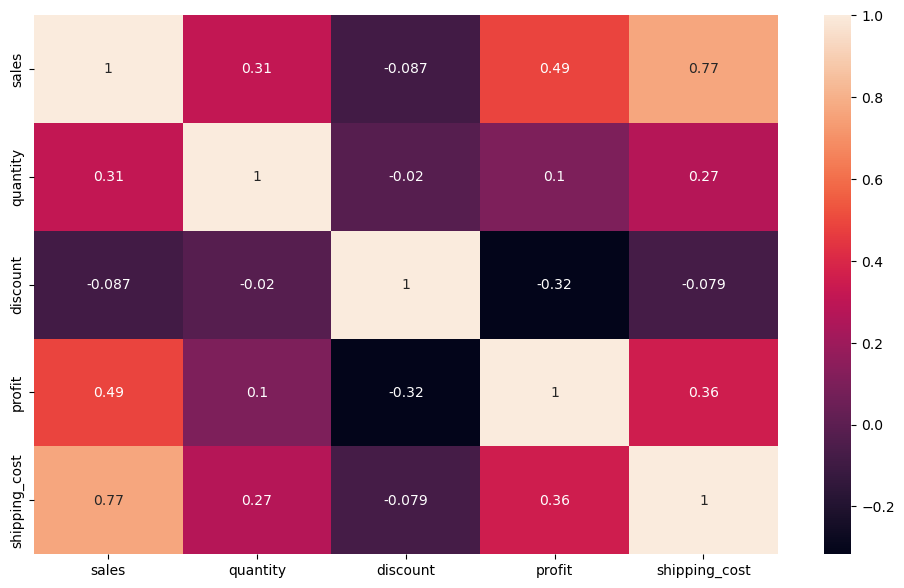

In [9]:
num_cols = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']

plt.figure(figsize=(12, 7))
sns.heatmap(data[num_cols].corr(), annot = True)
plt.show()

### 4.4. Distributions and outliers 

SALES


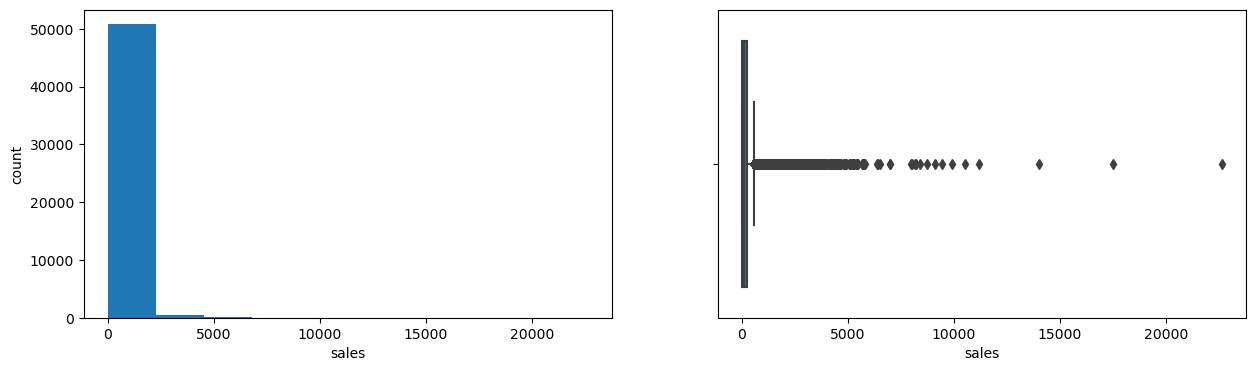

QUANTITY


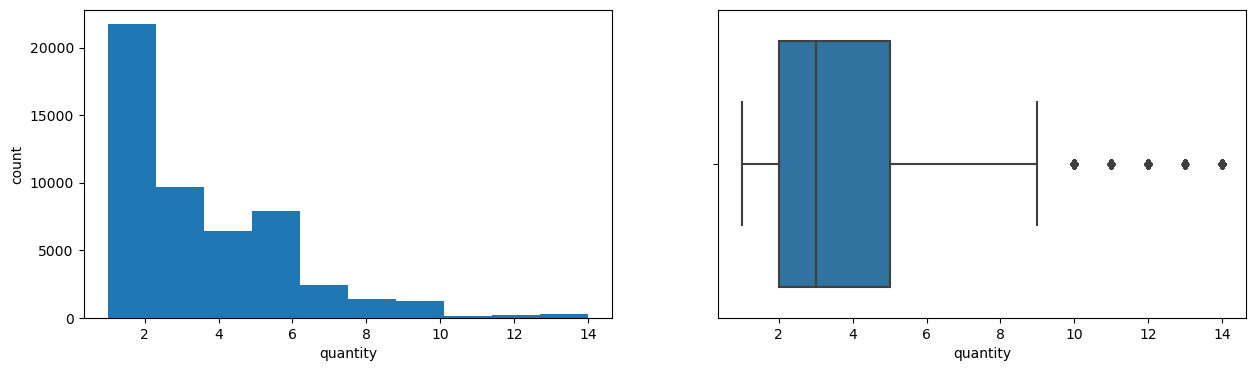

DISCOUNT


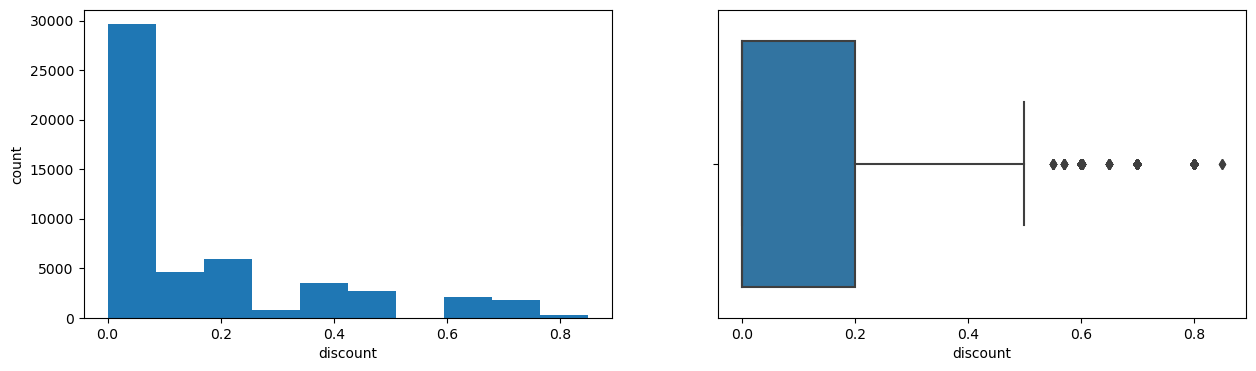

PROFIT


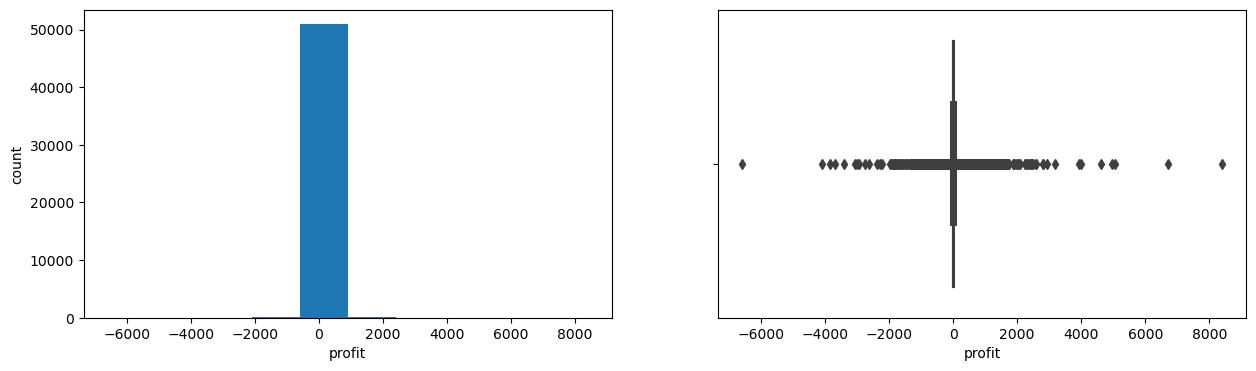

SHIPPING_COST


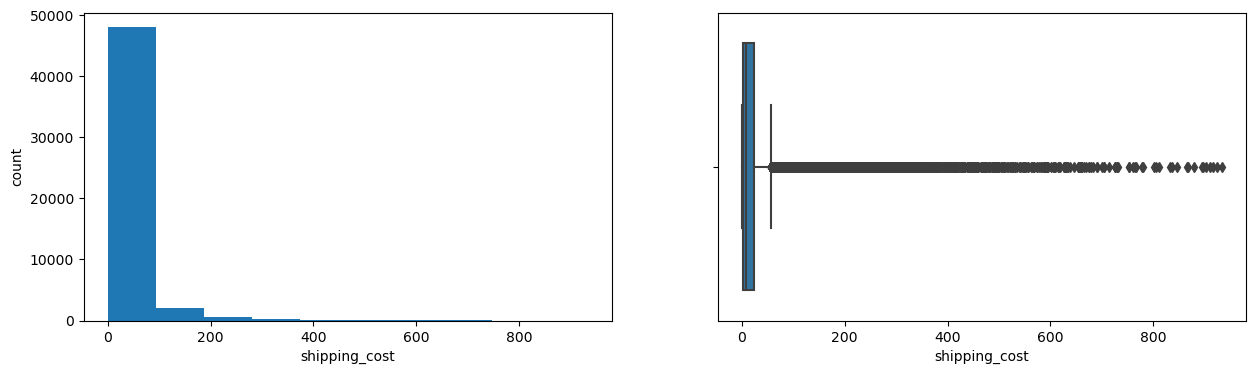

In [10]:
# Plotting histogram and boxplot of numerical variables
num_cols = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']

for col in num_cols:
    print(col.upper())
    #print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

The profiling of our dataset shows us the following:
  - There are **no missing values, neither duplicates**.
  - The **category** variable is highly correlated with the **sub category** variable.
  - The **market** variable is highly correlated with the **region** variable.
  - The **profit** variable is highly correlated with the **discount** variable.\
It can be considered to use only one of them during the feature selection of the modeling.
  - The **sales** variable is highly correlated with the **Shipping cost** variable.
  - The distributions of the numerical variables are skewed and they present outliers.

### 4.5. Sales Analysis

To have initial insights, let's proceed to a simple sales analysis.
   - First, we will see the evolution of the sales over the time (daily, monthly, yearly)
   - After we will check the **top selling products**, the **top Countries** and the **top customer segment** based on sales.

In [11]:
# Defining a function to calculate de cumulative daily/monthly/yearly sales.

def Cum_sales(df,time=['daily', 'monthly','yearly']):
    df = df.copy()
    
    if time == 'daily':  
        df['date'] = df['order_date'].apply(lambda x: str(x)[:10])   
    elif time == 'monthly':
        df['date'] = df['order_date'].apply(lambda x: str(x)[:7]) 
    else:
        df['date'] = df['order_date'].apply(lambda x: str(x)[:4])
        
    # Sum sales per period:  
    df = df.groupby('date')['sales'].sum().reset_index() 
    
    return df

**DAILY SALES**

In [12]:
d_sales = Cum_sales(data, time='daily')
d_sales.head()

date  sales
0  2011-01-01    808
1  2011-01-02    314
2  2011-01-03   4502
3  2011-01-04   2809
4  2011-01-05   3664

**MONTHLY SALES**

In [13]:
m_sales = Cum_sales(data,'monthly')
m_sales.head()

date   sales
0  2011-01   98902
1  2011-02   91152
2  2011-03  145726
3  2011-04  116927
4  2011-05  146762

**YEARLY SALES**

In [14]:
y_sales = Cum_sales(data,'yearly')
y_sales.head()

date    sales
0  2011  2259511
1  2012  2677493
2  2013  3405860
3  2014  4300041

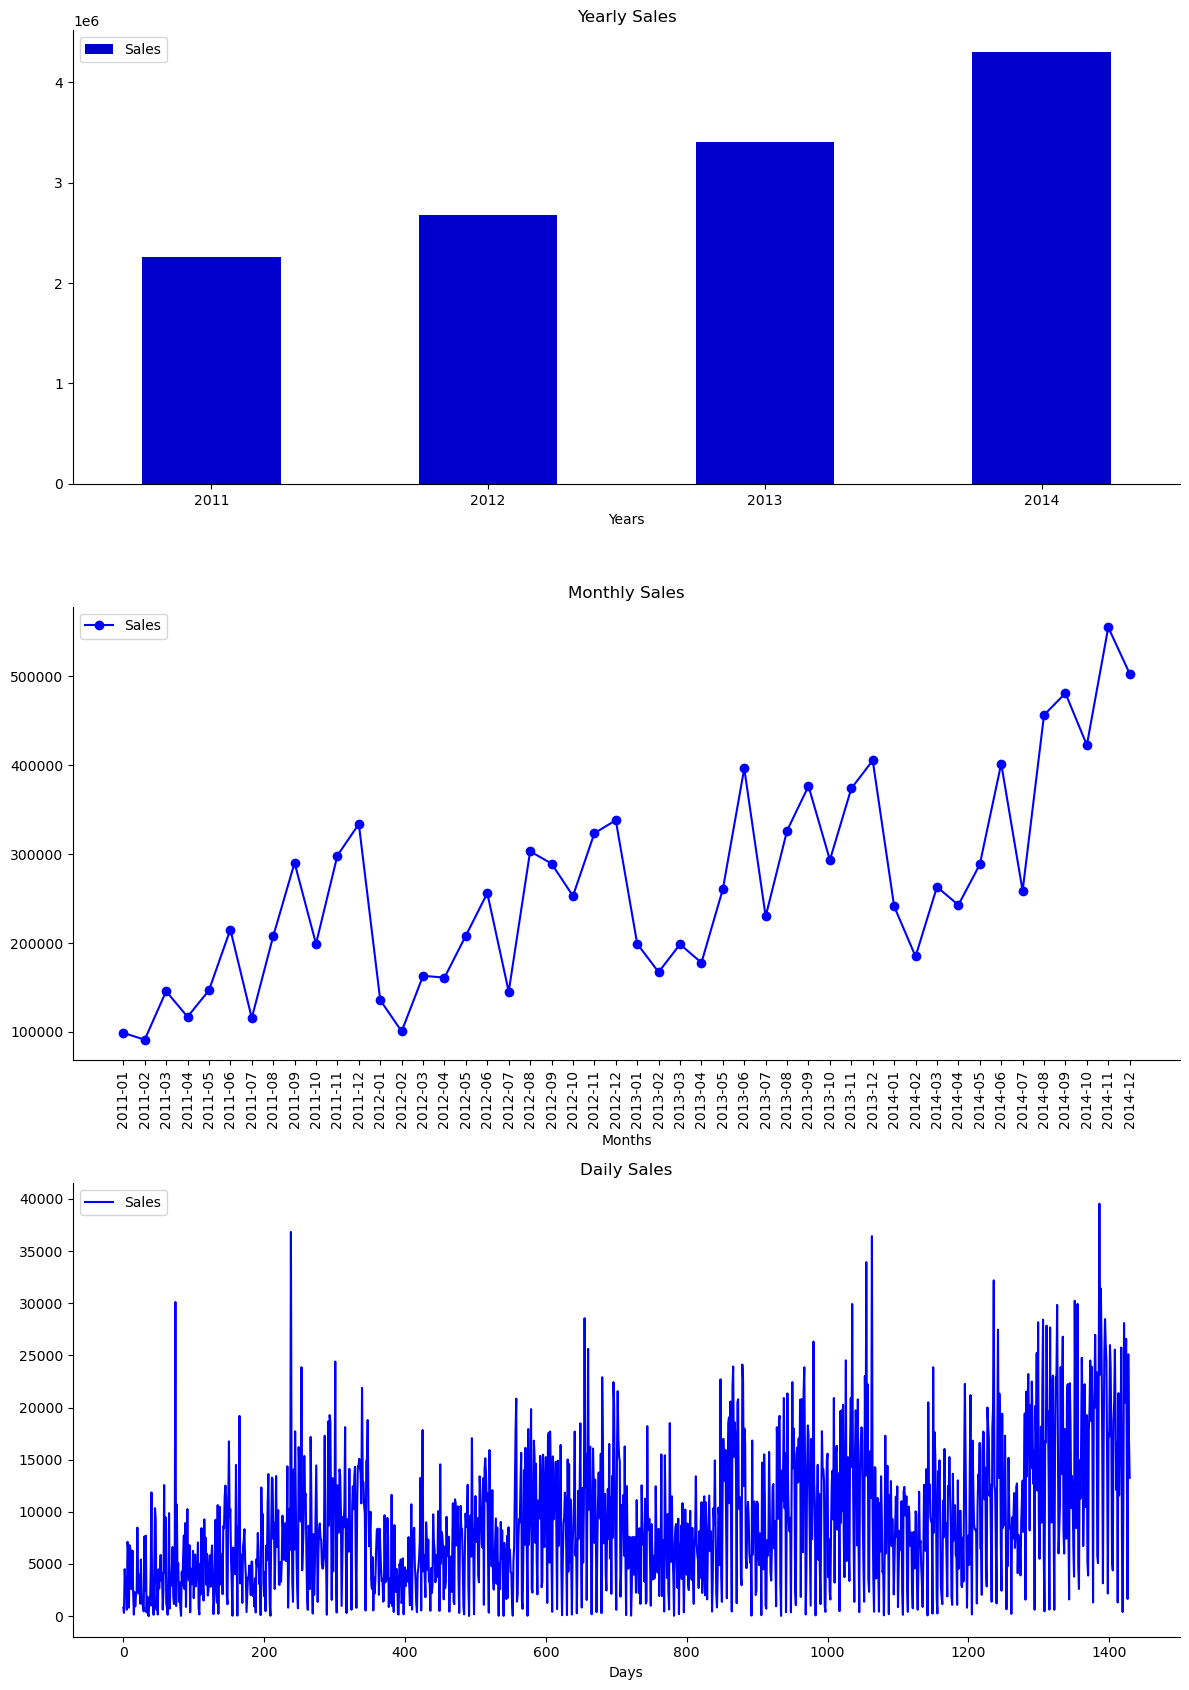

In [15]:
# Plotting daily/monthly/yearly total sales
layout = (3, 1)  
  
raw1 = plt.subplot2grid(layout, (0 ,0))  
raw2 = plt.subplot2grid(layout, (1 ,0)) 
raw3 = plt.subplot2grid(layout, (2 ,0))  
  
years = y_sales['sales'].plot(kind = "bar",color = 'mediumblue', label="Sales",ax=raw1, figsize=(12,17))  
months = m_sales['sales'].plot(marker = 'o',color = 'blue', label="Sales", ax=raw2)  
days = d_sales['sales'].plot(marker = '',color = 'blue', label="Sales", ax=raw3) 
  
years.set(xlabel = "Years",title = "Yearly Sales")  
months.set(xlabel = "Months", title = "Monthly Sales")  
days.set(xlabel = "Days", title = "Daily Sales") 

years.set_xticks([0,1,2,3],labels=y_sales['date'], rotation='horizontal')
months.set_xticks(np.arange(0,48),labels=m_sales['date'], rotation='vertical')
##days.set_xticks([0,1,2,3],labels=y_sales['date'], rotation='horizontal')

sns.despine()  
plt.tight_layout()  
  
years.legend()  
months.legend()  
days.legend()

Let's define a function that aggregates the sales by a given item (product, country, segment) 

In [16]:
def top_item(df, column):
    top_items = df.groupby(df[column])['sales'].sum().sort_values(ascending=False).reset_index().head(10)
    sns.barplot(x=top_items[column], y=top_items['sales'], palette="Blues_r")
    plt.title(f"Top {column} by sales")
    plt.xlabel(f'{column}')
    plt.xticks(rotation =75)
    plt.show()
    
    return 

**TOP PRODUCTS BASED ON SALES**

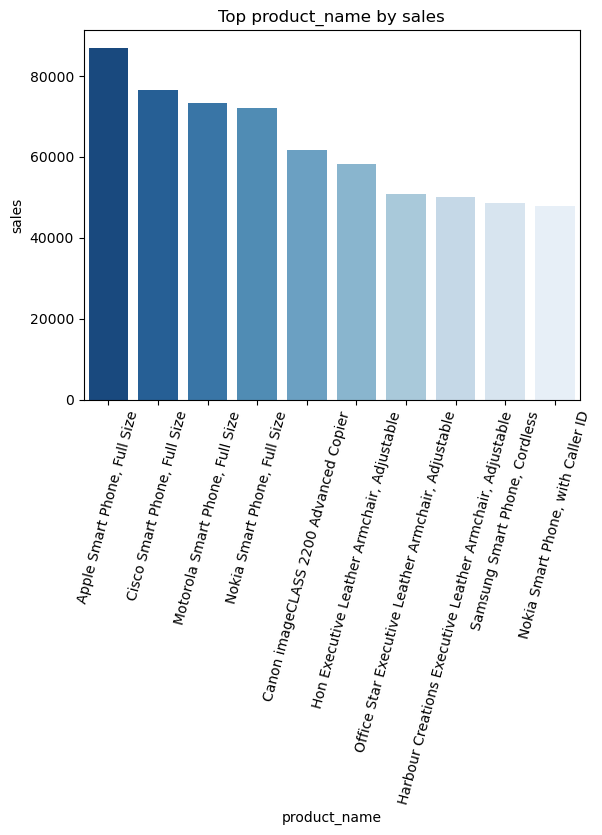

In [17]:
top_products = top_item(data, 'product_name')
top_products

**TOP SUB-CATEGORIES BASED ON SALES**

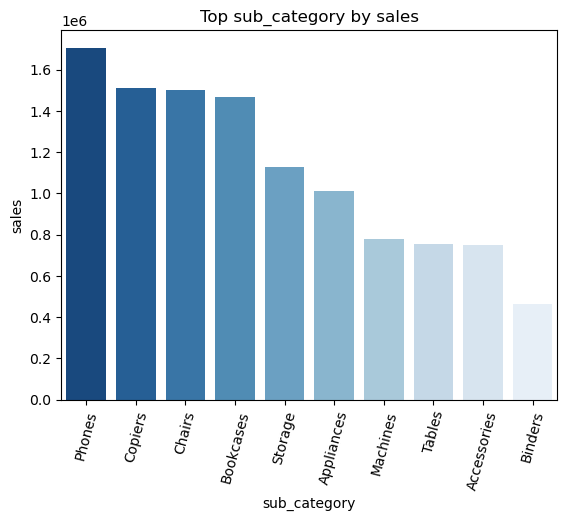

In [18]:
top_Subcategories = top_item(data, 'sub_category')
top_Subcategories

**SALES BY COUNTRY**

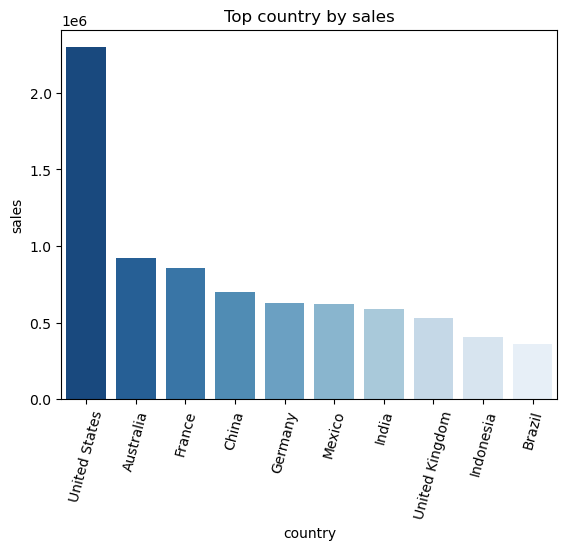

In [19]:
top_country = top_item(data, 'country')
top_country

**SALES BY SEGMENT**

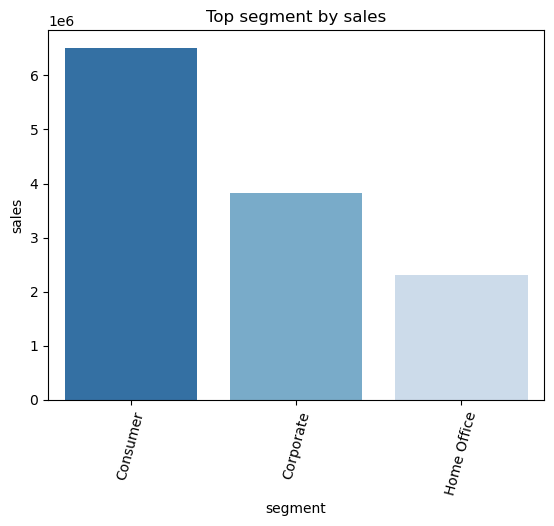

In [20]:
top_Segment = top_item(data, 'segment')
top_Segment

**INSIGHTS FROM EDA**: 
    
  - We can see that over the 4 years span of our historical data, the yearly total sales increases around 20% each year.
  - Based on monthly period, in all the 4 years, each year starts low the first 3 months and the sales raise quite significantly on August and September, drop slightly on October and raise again on Novembers and Decembers. 
This fluctuating pattern makes all its sense as on August and September, people makes more purchase for the start of the school year. On November and December, people tends to buy a lot for thanksgiving and Christmas. 
  - The top selling products are mostly smartphone or something related to technology. This is for sure due to the unit price of those item which is relatively high compared to office supplies.
  - Related to customers behavior, the top clients resides in the US and from the Consumer Segment which pays almost 50% of the total sales. 

## 5. DATA PREPROCESSING AND FEATURE ENGINEERING

**FEATURE SELECTION**:

For the modeling, we decided to reduce the number of features from the 20 original variables. 
 - So we will drop **order_id** as it won't have any impact on predicting sales.
 - Also we will drop **year** column as we will extract from order_date the year, month and day.
 - We will let go categorical features that have too high unique values (**customer_name, product_name, product_id, country, state**) because encoding them will make sparse a lot our features number at the end. On the other side we opt to keep their equivalent with reasonable number of unique values: **segment** to represent the customers, **sub_category** for products (we opt for this as category is too general compared to sub_category), and **market** to represent the country (market has less unique values than region).
 - We decided to drop also the **profit** column as it is a variable that depends on sales. 

At the end, we will stay with **10 independent variables**.

**FEATURE ENGINEERING**
 - First thing that will be done is encoding the date variables: **order_date , ship_date**, meaning extracting day, month and year.
 - As we saw earlier from the EDA that our numerical values have outliers. To handle them we will use the **threshold capping** method or **IQR**. 
 - Before applying any further preprocessing, we will **split** at this point our data set into **train data set** and **test data set**. It's on them that we will perform the following process: 
 
     - We will create a column transformer that includes the **encoding of the categorical data** that we will pass to the pipeline of the modeling after. Note that except for the order_priority column, all the categorical variables will be **onehot-encoded**. **order_priority** will be encoded with **OrdinalEncoder**.
     - Also in that pipeline, we will pass a **Standard Scaler** to scale our data.\
   We proceed this way to control possible **data leakage**. 

In [21]:
# Creating a function to extract the corresponding day/month/year of date variables 
def encode_date(df, column):
    df[column] = pd.to_datetime(df[column], format='%d-%m-%Y')
    df[column + '_year'] = pd.to_datetime(df[column]).apply(lambda x: x.year)
    df[column + '_month'] = pd.to_datetime(df[column]).apply(lambda x: x.month)
    df[column + '_day'] = pd.to_datetime(df[column]).apply(lambda x: x.day)
    df.drop(column, axis = 1)
    return df

In [22]:
# Creating a function to handling the outliers using IQR
def handling_ouliers (df, columns):
    
    for col in columns:
        
        q1, q3 = df[col].quantile([0.25, .75])
        iqr = q3 - q1
        top_boundary = q3 + (iqr * 1.5)
        df.loc[df[col] >= top_boundary, col] = top_boundary
        
    return df         

In [23]:
# Creating a function that incorporates the preprocessing steps: 
  # (features selection, encode date variables, handle outliers)
def preprocess_inputs(df):
    df = df.copy()  
    
    # Dropping unnecessary columns (features selection)
    columns_to_drop = ['row ID', 'order_id','customer_name', 'state', 'country', 'region', 'product_id' ,'category', 'product_name', 'profit', 'year']
    df = df.drop(columns=[col for col in columns_to_drop if col in df], errors='ignore')
    
    # Extract date features
    df = encode_date(df, column='order_date')
    df = encode_date(df, column='ship_date')
    df = df.drop(columns=['order_date', 'ship_date'], axis = 1)
    
    # Handling outliers
    num_cols = ['sales', 'quantity', 'discount', 'shipping_cost']
    handling_ouliers (df, num_cols)
        
    return df

In [24]:
# Creating a function that split the data set into train and test sets
def split_data(df):

    # Splitting df into Y (target) and X (independent variables)
    y = df['sales']
    x = df.drop(['sales'], axis=1)
    
    # Train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=1)

    return x_train, x_test, y_train, y_test

In [25]:
# Applying the feature engineering steps to our actual dataset
Processed_data= preprocess_inputs(data)
Processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ship_mode         51290 non-null  object 
 1   segment           51290 non-null  object 
 2   market            51290 non-null  object 
 3   sub_category      51290 non-null  object 
 4   sales             51290 non-null  int64  
 5   quantity          51290 non-null  float64
 6   discount          51290 non-null  float64
 7   shipping_cost     51290 non-null  float64
 8   order_priority    51290 non-null  object 
 9   order_date_year   51290 non-null  int64  
 10  order_date_month  51290 non-null  int64  
 11  order_date_day    51290 non-null  int64  
 12  ship_date_year    51290 non-null  int64  
 13  ship_date_month   51290 non-null  int64  
 14  ship_date_day     51290 non-null  int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 5.9+ MB


In [26]:
# Splitting the preprocessed data set
x_train, x_test, y_train, y_test= split_data(Processed_data)
print(f"Shape of x Train: {x_train.shape}\nShape of y Train: {y_train.shape}\nShape of x Test: {x_test.shape}\nShape of y Test: {y_test.shape}")

Shape of x Train: (35903, 14)
Shape of y Train: (35903,)
Shape of x Test: (15387, 14)
Shape of y Test: (15387,)


In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35903 entries, 3488 to 33003
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ship_mode         35903 non-null  object 
 1   segment           35903 non-null  object 
 2   market            35903 non-null  object 
 3   sub_category      35903 non-null  object 
 4   quantity          35903 non-null  float64
 5   discount          35903 non-null  float64
 6   shipping_cost     35903 non-null  float64
 7   order_priority    35903 non-null  object 
 8   order_date_year   35903 non-null  int64  
 9   order_date_month  35903 non-null  int64  
 10  order_date_day    35903 non-null  int64  
 11  ship_date_year    35903 non-null  int64  
 12  ship_date_month   35903 non-null  int64  
 13  ship_date_day     35903 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 4.1+ MB


In [28]:
# Initializing the encoders and the scaler
ohe = OneHotEncoder()
oe = OrdinalEncoder()
scaler = StandardScaler()


# Setting a preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
    ('OHE', ohe,['ship_mode', 'segment','market','sub_category']),
    ('OE', oe,['order_priority'])
    ],
    remainder= 'passthrough',
    )

## 6. MACHINE LEARNING

### 6.1. Base Models Training

**MODELS SELECTION:** 
    
The initial idea of this study was to compare the performance of the traditional approah **Linear Regression** with the one of a **Neural network**. Both are common techniques used in sales forecasting. Neverthless, we decided at the end to incorporate also two **decision tree-based algorithms** which are **Random Forest** and **XGBoost**. Moreover, they are part of what is called Ensemble methods which in general can create a more accurate prediction. Besides, they are particularly common in sales forecasting due to the fact that they can help identify most important factors  that can influence sales.  

For each algorithm, we will:
    
   - ***create*** the model, 
   - ***fit*** it on our train data set,
   - ***make prediction*** using the test data set,
   - **evaluate*** the model performance (Mean Squarred Error MSE, Mean Absolute Error MAE, R2 score),
   - ***interpret*** by checking the **features importance***. 
    
Then we will compare the performance of the Linear Regression model, the  random Forest Model and the XGBoost model.

### <font color='#347B98'> A. LINEAR REGRESSION

### A.1. Model Training of LR 

In [29]:
# Creating the Model pipeline 
pipe_lr = make_pipeline(preprocessor, StandardScaler(), LinearRegression())

pipe_lr.fit(x_train, y_train)

# Making predictions
y_pred_lr = pipe_lr.predict(x_test)

# Evaluate the linear regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MSE: {mse_lr}\nMAE: {mae_lr}\nR2 Score: {r2_lr}")  

MSE: 5217.62148933484
MAE: 48.17170939119075
R2 Score: 0.8568139323460984


In [30]:
# Getting features names after preprocessing transformer
feature_names = pd.Series(preprocessor.get_feature_names_out())
feature_names = feature_names.replace('OHE__','', regex=True).replace('OE__','', regex=True).replace('remainder__','', regex=True)
feature_names

0        ship_mode_First Class
1           ship_mode_Same Day
2       ship_mode_Second Class
3     ship_mode_Standard Class
4             segment_Consumer
5            segment_Corporate
6          segment_Home Office
7                  market_APAC
8                market_Africa
9                market_Canada
10                 market_EMEA
11                   market_EU
12                market_LATAM
13                   market_US
14    sub_category_Accessories
15     sub_category_Appliances
16            sub_category_Art
17        sub_category_Binders
18      sub_category_Bookcases
19         sub_category_Chairs
20        sub_category_Copiers
21      sub_category_Envelopes
22      sub_category_Fasteners
23    sub_category_Furnishings
24         sub_category_Labels
25       sub_category_Machines
26          sub_category_Paper
27         sub_category_Phones
28        sub_category_Storage
29       sub_category_Supplies
30         sub_category_Tables
31              order_priority
32      

### A.2. Model Interpretation of LR Model

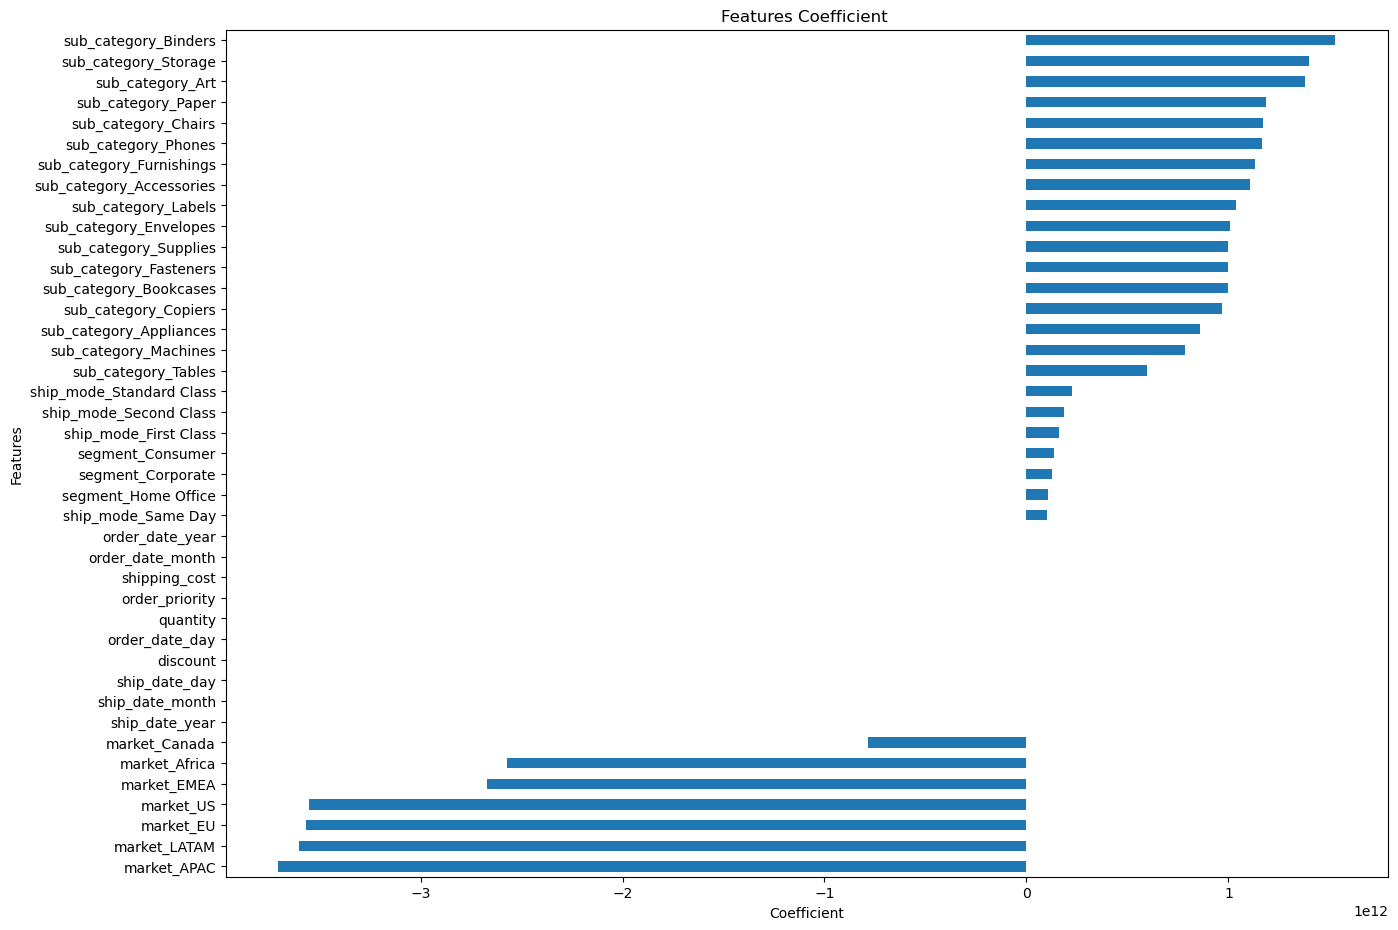

In [31]:
# Getting and plotting the coeficient of each features

coef_df = pd.Series(pipe_lr[2].coef_, index=feature_names).sort_values()

plt.figure(figsize=(15,11))
coef_df.plot(kind='barh')
plt.title('Features Coefficient ')
plt.ylabel('Features')
plt.xlabel('Coefficient')
plt.show();

### <font color='#347B98'> B. RANDOM FOREST

### B.1. Model Training  of RF Model

In [32]:
# Setting the parameters of the Random Forest model
rf_params = {
    'n_estimators': 200,
    'max_depth': 30
}

# Creating the Model pipeline 
pipe_rf = Pipeline(steps=[
    ('encoding', preprocessor),
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(**rf_params)),
])

pipe_rf.fit(x_train,y_train)

# Making predictions
y_pred_rf = pipe_rf.predict(x_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)  
r2_rf = r2_score(y_test, y_pred_rf) 

print(f"MSE: {mse_rf}\nMAE: {mae_rf}\nR2 Score: {r2_rf}")

MSE: 4363.64760216145
MAE: 37.30515094893752
R2 Score: 0.8802493546038104


### B.2. Model Interpretation of RF Model

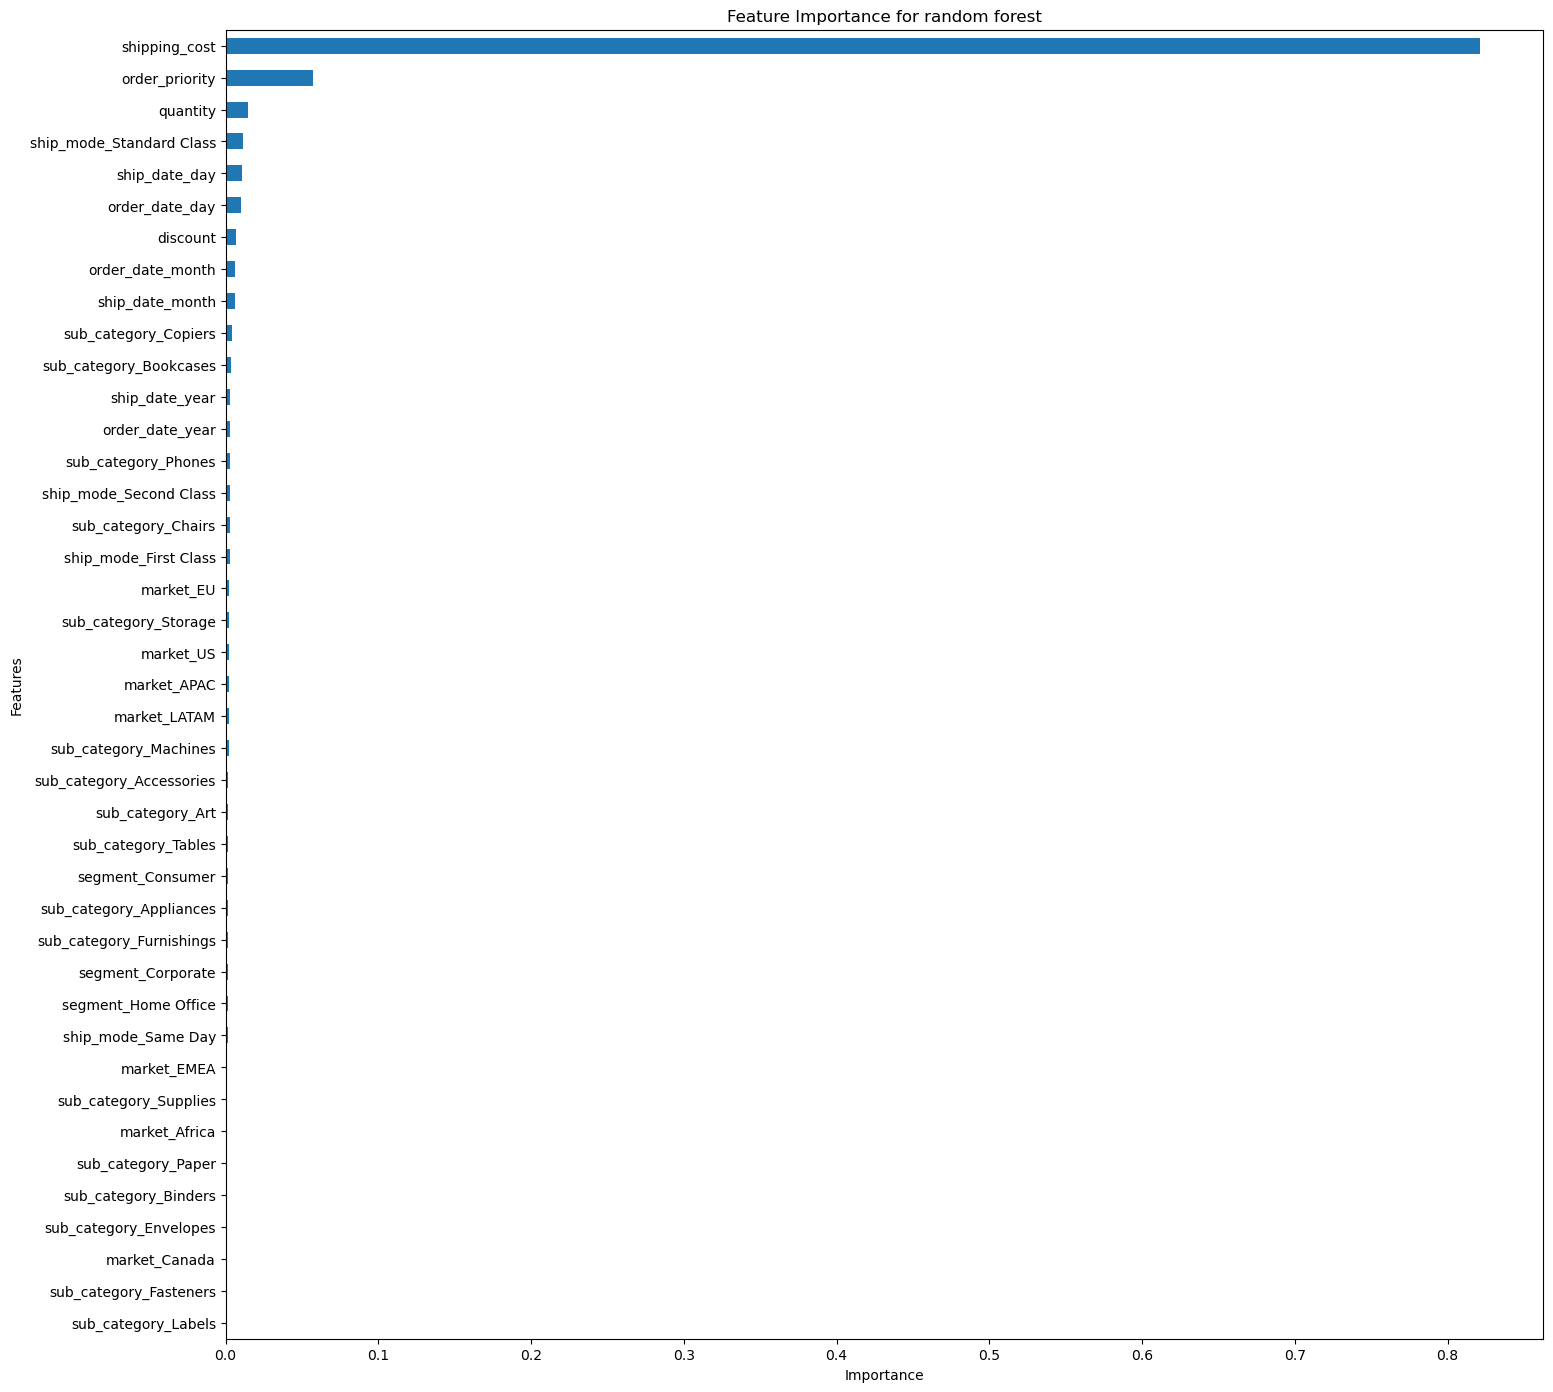

In [33]:
# Plotting the feature importance on the Random Forest model
plt.figure(figsize=(17,17))
pd.Series(pipe_rf['rf'].feature_importances_, index=feature_names).sort_values().plot(kind='barh')
plt.title('Feature Importance for random forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show();

### <font color='#347B98'> C. XGBOOST

### C.1. Model Training of XGB Model

In [34]:
# Defining the parameters of the XGB regressor
xgb_params = {
    'objective': 'reg:squarederror', 
    'colsample_bytree' : 0.7,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 100
}

# Model pipeline 
pipe_xgb = Pipeline(steps=[
    ('encoding', preprocessor),
    ('scaler',StandardScaler()),
    ('xgb',xgb.XGBRegressor(**xgb_params)),
])

pipe_xgb.fit(x_train,y_train)

# Make predictions 
y_pred_xg = pipe_xgb.predict(x_test)

# Evaluate the model
mse_xg = mean_squared_error(y_test, y_pred_xg)
mae_xg = mean_absolute_error(y_test, y_pred_xg)  
r2_xg = r2_score(y_test, y_pred_xg) 

print(f"MSE: {mse_xg}\nMAE: {mae_xg}\nR2 Score: {r2_xg}") 

MSE: 3798.5605523058084
MAE: 35.3747551483077
R2 Score: 0.8957569173345229


### C.2. Model Interpretation of XGB Model

[18:59:48] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


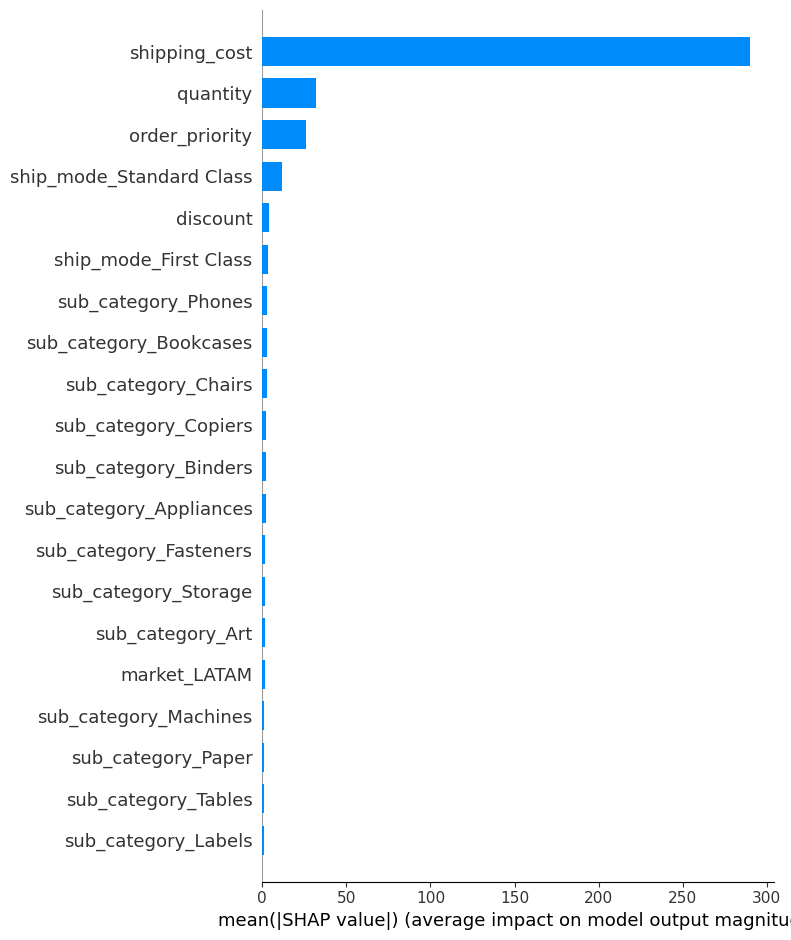

In [35]:
# Getting the feature importance of the model using SHAP

shap.initjs() 

#set the tree explainer as the model of the pipeline
explainer = shap.TreeExplainer(pipe_xgb['xgb'])

#apply the preprocessing to x_test
observations = pd.DataFrame(preprocessor.transform(x_test), columns= feature_names.tolist())

#get Shap values from preprocessed data
shap_values = explainer.shap_values(observations)

##explainer.shap_values(observations)

#plot the feature importance
shap.summary_plot(shap_values, observations , plot_type="bar")

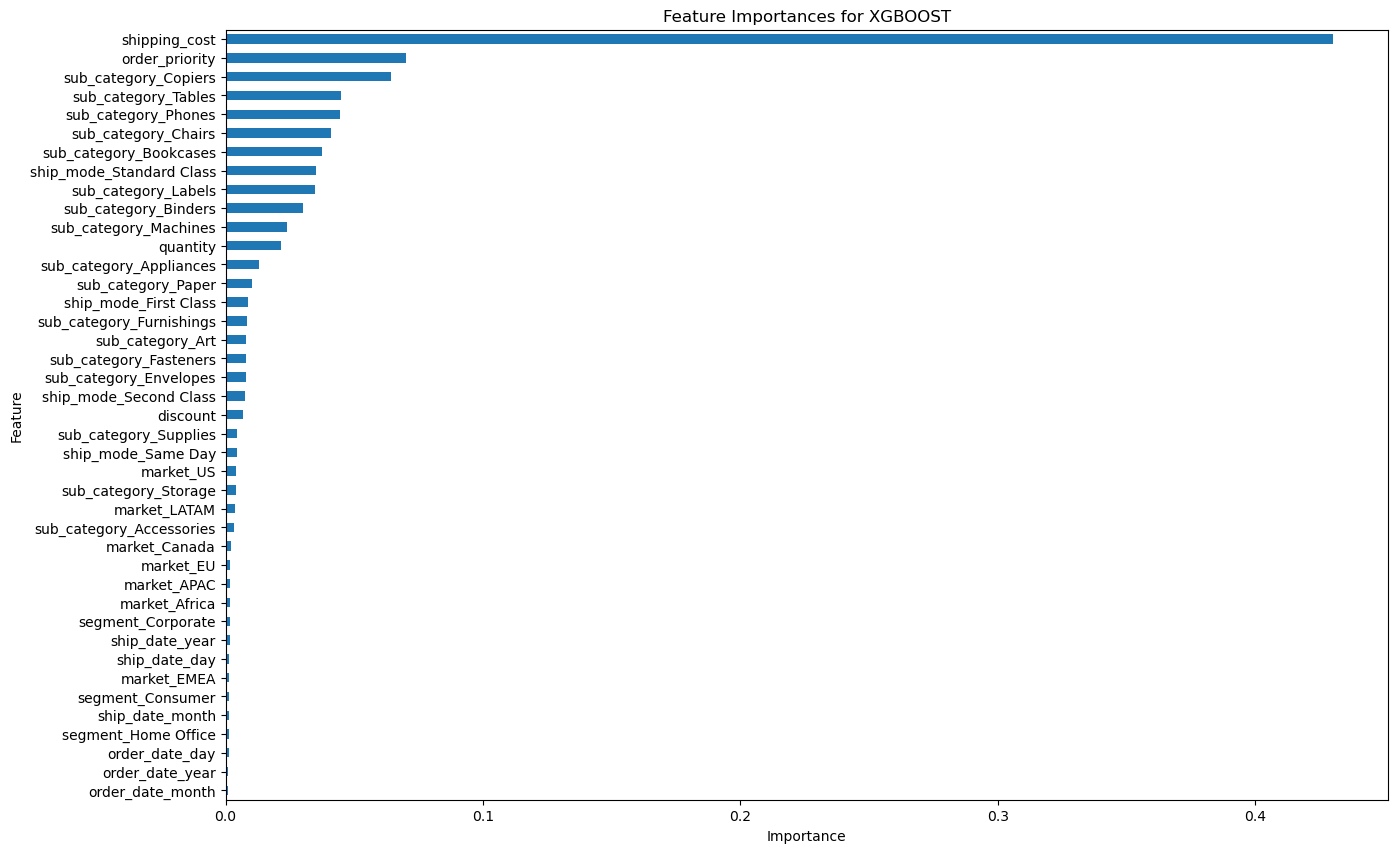

In [36]:
# Plotting the importance of the features on the XGB model
pd.Series(pipe_xgb.named_steps['xgb'].feature_importances_ , index = feature_names.tolist()).sort_values().plot(kind='barh', figsize=(15, 10))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for XGBOOST')
plt.show()

### <font color='#347B98'> D. NEURAL NETWORKS

### D.1. Model Training of NN Model

In [37]:
# Preparing dataset by applying the preproccessing of encoding categorical features and Scaling of the data
pipe_pre_nn = Pipeline(steps=[
    ('encoding', preprocessor),
    ('scaler', StandardScaler()),
])

X_train_nn, y_train_nn = pipe_pre_nn.fit_transform(x_train), y_train
X_test_nn, y_test_nn = pipe_pre_nn.transform(x_test), y_test

print(f"Shape of X_Train_nn: {X_train_nn.shape}\nShape of y_train_nn: {y_train_nn.shape}\nShape of X_test_nn: {X_test_nn.shape}\nShape of y_test_nn: {y_test_nn.shape}")

Shape of X_Train_nn: (35903, 41)
Shape of y_train_nn: (35903,)
Shape of X_test_nn: (15387, 41)
Shape of y_test_nn: (15387,)


In [59]:
# Define the input layer with the shape corresponding to the number of features in the training data
inputs = tf.keras.Input(shape=(X_train_nn.shape[1],))

# Create the first hidden layer with 128 neurons and ReLU activation function, connected to the input layer
x = tf.keras.layers.Dense(1000, activation='relu')(inputs)

# Create the second hidden layer with 128 neurons and ReLU activation function, connected to the first hidden layer
x = tf.keras.layers.Dense(1000, activation='relu')(x)

# Create the output layer with 1 neuron and linear activation function, connected to the second hidden layer
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

# Create a Keras Model, specifying the input and output layers
model_nn = tf.keras.Model(inputs=inputs, outputs=outputs)

# Print the model summary, showing the architecture and the number of parameters
print(model_nn.summary())

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 41)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_9 (Dense)                 │ (None, 1000)              │     42,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_10 (Dense)                │ (None, 1000)              │  1,001,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_11 (Dense)                │ (None, 1)                 │      1,001 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,044,001 (3.98 MB)

 Trainable params: 1,044,001 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

None


In [60]:
# Compile the model
model_nn.compile(optimizer='adam', loss='mse')

# Train the model
history = model_nn.fit(
    X_train_nn,
    y_train_nn,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            factor=0.2,
            patience=3,
            min_lr=1e-6
        )
    ]
)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 12530.0439 - val_loss: 4204.2920 - learning_rate: 0.0010
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4225.8906 - val_loss: 3844.1821 - learning_rate: 0.0010
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4009.3157 - val_loss: 3720.5566 - learning_rate: 0.0010
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3827.4614 - val_loss: 3642.2280 - learning_rate: 0.0010
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3610.6584 - val_loss: 3592.1343 - learning_rate: 0.0010
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3577.5229 - val_loss: 3543.9214 - learning_rate: 0.0010
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3464.2620 - val_loss: 3491.8452 - learning_rate: 0.0010
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3508.8271 - val_loss: 3536.1531 - learning_rate: 0.0010
Epoch 9/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3157.5078 -

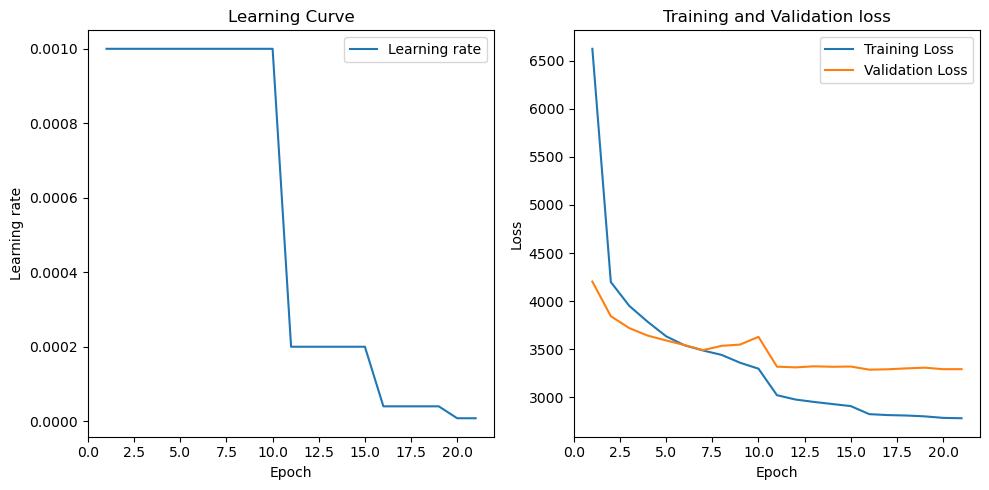

In [61]:
# Plotting the Learning rate and the loss from the model
epochs = len(history.history['loss'])

epochRange = range(1,epochs+1)
fig , ax = plt.subplots(1,2,figsize = (10,5))

ax[0].plot(epochRange,history.history['learning_rate'],label = 'Learning rate')
ax[0].set_title('Learning Curve')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Learning rate')
ax[0].legend()
ax[1].plot(epochRange,history.history['loss'],label = 'Training Loss')
ax[1].plot(epochRange,history.history['val_loss'],label = 'Validation Loss')
ax[1].set_title('Training and Validation loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
fig.tight_layout()
plt.show()

### D.2. Model Evaluation of NN model

In [62]:
# Pedicting on X_test set
y_pred_nn = np.squeeze(model_nn.predict(X_test_nn))

# Evaluate the model on the test set
test_loss = model_nn.evaluate(X_test_nn, y_test_nn, verbose=0)

mse_nn = mean_squared_error(y_test_nn, y_pred_nn)
mae_nn = mean_absolute_error(y_test_nn, y_pred_nn)  
r2_nn = r2_score(y_test, y_pred_nn) 

# Print the metrics
print('Test Loss: {:.5f}'.format(test_loss))
print(f"MSE: {mse_nn}\nMAE: {mae_nn}\nR2 Score: {r2_nn}") 

481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
Test Loss: 3627.29883
MSE: 3626.323646648498
MAE: 35.107457711774565
R2 Score: 0.9004835778016259


### D.3. Model Interpretation of NN model

In [308]:
# # set the tree explainer
# explainer = shap.KernelExplainer(model_nn.predict, X_train_nn)

# # Get the Shap values
# shap_values = explainer.shap_values(X_test_nn, nsamples=100)

# # plot the prediction difference
# shap.force_plot(explainer.expected_value, shap_values, X_test_nn)

1122/1122 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


Using 35903 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/15387 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 37s 331us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 37s 331us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 36s 319us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 37s 332us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 38s 339us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 38s 341us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 38s 337us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 39s 344us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 38s 340us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 36s 318us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
112197/112197 ━━━━━━━━━━━━━━━━━━━━ 37s 333us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
112197

KeyboardInterrupt: 

**SUMMARY on the Neural Network model**\
The neural network model performs the better compared to the XGBoost Baseline model.

We tried to create a force plot of the shap values to interpret the NN model, but the running time is too long that we had to interrupt the kernel. Therefore, it is quite difficult for us to interpret this model and on top it was the model that we had trouble to built.

### 6.2. Base Models Evaluation and Model Selection

In [44]:
# Create a dictionnary to store all of the metrics from the 3 baseline models
metrics_dict = {
    'Linear Regression': [mse_lr, mae_lr, r2_lr],
    'Random Forest': [mse_rf, mae_rf, r2_rf],
    'XGBoost': [mse_xg, mae_xg, r2_xg],
    'Neural Networks':[mse_nn, mae_nn, r2_nn]
}

# Converting the dict into dataframe
models_metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index',  
                                        columns=['MSE', 'MAE','R2']).sort_values(by='MSE', ascending=False)  
     
models_metrics_df

MSE        MAE        R2
Linear Regression  5217.621489  48.171709  0.856814
Random Forest      4363.647602  37.305151  0.880249
XGBoost            3798.560552  35.374755  0.895757
Neural Networks    3642.202346  34.765968  0.900048

This comparison shows that the Neural Networks model is the most performant model as it has the lowest MSE and MAE and the highest R2 Score. However, we will choose the XGBoost model to perform our hyperparameter tunning on for our model validation as due to time constraint, it is easier to implement and interpret than the Neural Network model.

The Linear regression model has not a bad performance (R2_Score of 0.85) for being a simplistic method.

Both the Random Forest model and the XGBoost depict the shipping_cost as the most important feature with a really high value than the rest. This is probably due to the high correlation it has with the target variable as we have seen in the EDA section. While the order_month does not have much impact which was expected as we have seen in the EDA part the fluctuation patterns of the sales especially monthly based.



### 6.3. Hyperparameter tuning

<font size=3 > We will use GridSearch to acheive our parameter tunning.

In [45]:
# prepocessing transformers 
preprocessor = ColumnTransformer(
    transformers=[
    ('OHE', ohe,['ship_mode', 'segment','market','sub_category']),
    ('OE', oe,['order_priority'])
    ],
    remainder= 'passthrough',
    )

# Defining the parameter grid
xgb_param_grid = {
    'xgb__colsample_bytree': [0.5, 0.6, 0.7],
    'xgb__learning_rate':[0.1, 0.2, 0.3, 0.4], 
    'xgb__max_depth':[2, 3, 4, 5, 6, 7],
    'xgb__n_estimators':[80, 90, 100, 200]
}

# Defining the XGBregressor parameters
xgb_params = {
    'objective': 'reg:squarederror',
    'random_state': 42
}
# Model pipeline that works on training set and perfrom the steps mentioned in pipeline in order
pipe_xgb_t = Pipeline(steps=[
    ('encoding',preprocessor),
    ('scaler',StandardScaler()),
    ('xgb', xgb.XGBRegressor(**xgb_params))
])

gs = GridSearchCV(pipe_xgb_t, param_grid = xgb_param_grid, cv=5, n_jobs=-1)

gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(),
                                                                         ['ship_mode',
                                                                          'segment',
                                                                          'market',
                                                                          'sub_category']),
                                                                        ('OE',
                                                                         OrdinalEncoder(),
                                                                         ['order_priority'])])),
                                       ('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsa...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.5, 0.6, 0.7],
                         'xgb__learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'xgb__max_depth': [2, 3, 4, 5, 6, 7],
                         'xgb__n_estimators': [80, 90, 100, 200]})

In [46]:
gs.best_params_

{'xgb__colsample_bytree': 0.7,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 6,
 'xgb__n_estimators': 200}

In [47]:
best_model = gs.best_estimator_

In [48]:
y_pred_gs = best_model.predict(x_test)

# Evaluate the best model
mse_gs = mean_squared_error(y_test, y_pred_gs)
mae_gs = mean_absolute_error(y_test, y_pred_gs)  
r2_gs = r2_score(y_test, y_pred_gs)

print(f"MSE: {mse_gs}\nMAE: {mae_gs}\nR2 Score: {r2_gs}") 

MSE: 3624.7823166511544
MAE: 34.41116369561706
R2 Score: 0.900525876190217


### 6.4. Model Interpretation of the final model

[19:14:47] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


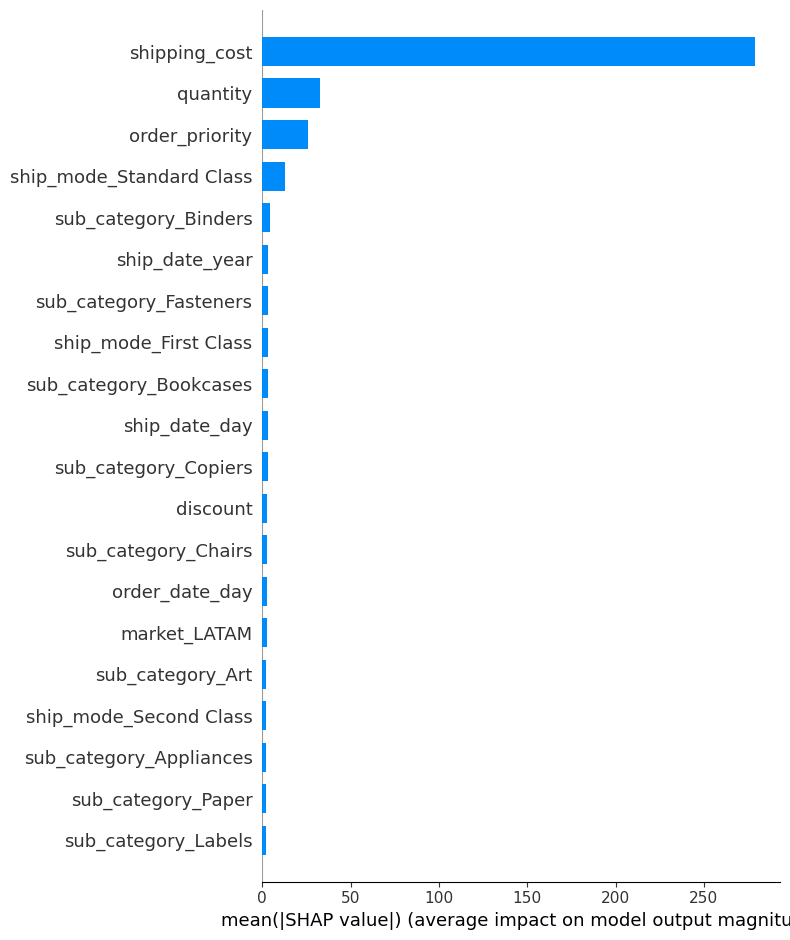

In [50]:
shap.initjs() 

# set the tree explainer
explainer = shap.TreeExplainer(best_model['xgb'])

# apply the preprocessing to x_test
preprocessor.fit(x_train,y_train)
observations = pd.DataFrame(preprocessor.transform(x_test), columns= feature_names.tolist())

# get Shap values from preprocessed data
shap_values = explainer.shap_values(observations)

# plot the feature importance
shap.summary_plot(shap_values, observations, plot_type="bar")

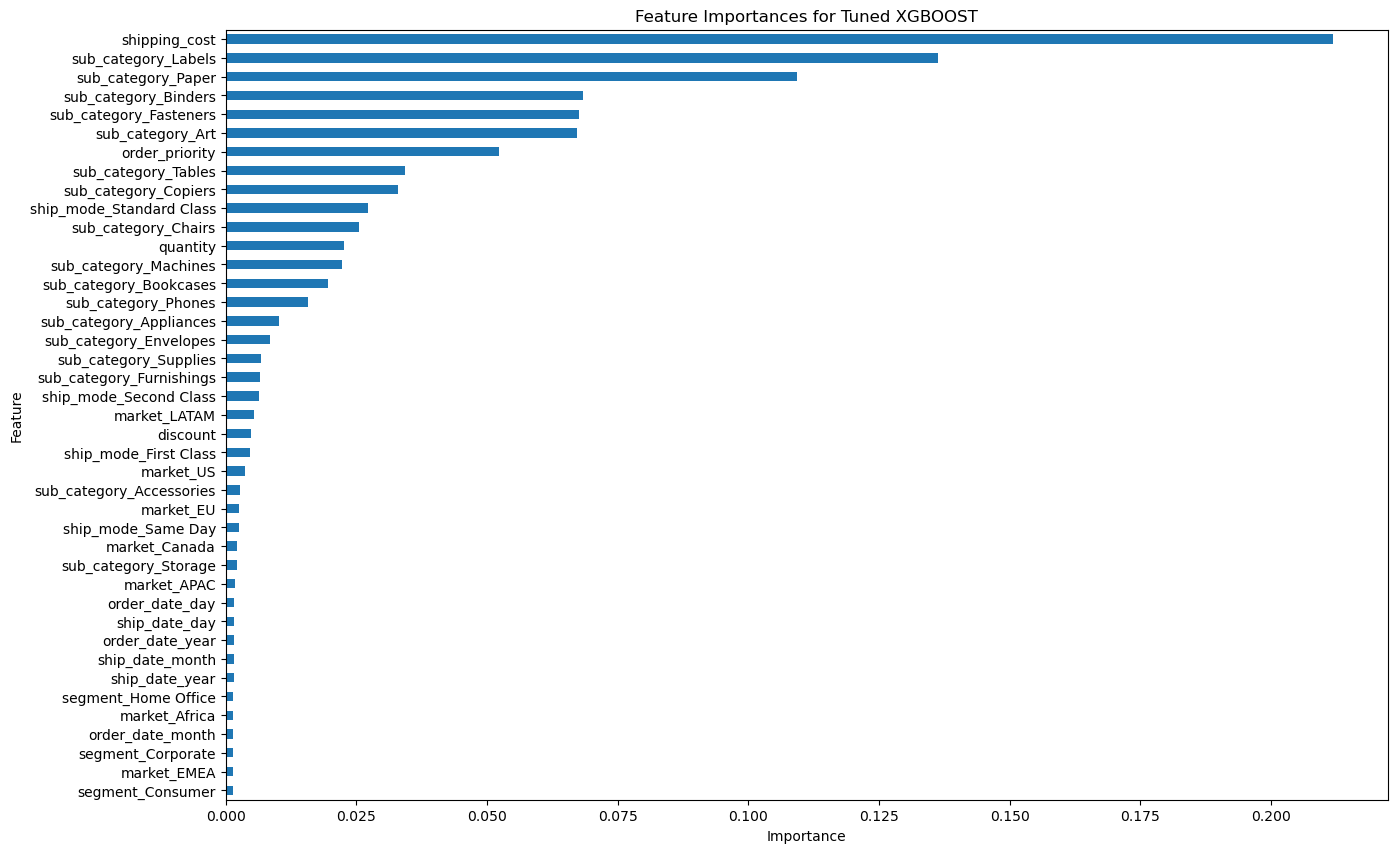

In [51]:
# Plotting the importance of the features on the XGB model
pd.Series(best_model.named_steps['xgb'].feature_importances_ , index = feature_names.tolist()).sort_values().plot(kind='barh', figsize=(15, 10))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Tuned XGBOOST')
plt.show()

**SUMMARY Best baseline model vs Best tunned model**:\
The performance of the best model from our tunning is sligthly higher but not of much. 

The SHAP explainers is showing that the shipping_cost is the most impactful parameter on predicting sales. Again, this high correlation between that variable and the target variable. 
    
Only based on the performance metrics or the model interpretation, it is kind of hard to figure out if our model is underfitting or overfitting. 

## 7. CONCLUSION

### FINAL THOUGHTS

It was an interesting process to conduct this comparative analysis. Fews take aways that we can highlight are:
   - Modern algorithm approach such as neural network performs definitely better than a simple traditional Linear regression. 
   - But compared to more sophisticated ML algorithms, the gain with NN is marignal. XGboost delivers better predictions after being fine tuned. It is easier to implement and to interpret. 
    
Conducting a sale forecasting using Machine Learning is for sure a win process for Business. It is a powerful tool to anticipate future demand and adjust their strategies accordingly.

### PROPOSED NEXT STEPS TO OPTIMIZE THE MODEL

We can propose the following further studies to optimize the model or to get better insights:
   - Plotting the predicted values against the actual values to define better which model is overfitting or underfitting.
   - Tuning parameters in the neural network to see if it can even perform better than it is actually.
   - Conducting a time series Analysis and compare the results with the one we get in this project.  